In [13]:
import komm
import numpy as np
import matplotlib.pyplot as plt

In [14]:
bit_vector = np.random.randint(0, 2, 100000)
bit_vector[:10]

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

In [17]:
# Define the SNR range
snr_range = np.arange(0, 25, 1)

ber_siso = []

for snr in snr_range:
    # AWGN no canal
    awgn_channel = komm.AWGNChannel(snr=10**(snr/10), signal_power=1)
    received_signal = awgn_channel(bit_vector)
    
    # demodula os bits enviados
    demodulated_bits = np.where(received_signal > 0.5, 1, 0)
    
    # BER
    ber = np.mean(bit_vector != demodulated_bits)
    ber_siso.append(ber)

# Vetor de duas antenas
ber_mrc_1x2 = []

for snr in snr_range:
    # AWGN no canal
    awgn_channel = komm.AWGNChannel(snr=10**(snr/10), signal_power=1)
    
    # envia o sinal para as duas antenas (MRC 1x2)
    received_signal_1 = awgn_channel(bit_vector)
    received_signal_2 = awgn_channel(bit_vector)
    
    # soma os sinais recebidos
    combined_signal = received_signal_1 + received_signal_2
    
    # demodula os sinais
    demodulated_bits = np.where(combined_signal > 1.0, 1, 0)
    
    # Calculo da BER
    ber = np.mean(bit_vector != demodulated_bits)
    ber_mrc_1x2.append(ber)

# Vetor de quatro antenas
ber_mrc_1x4 = []

for snr in snr_range:
    # AWGN no canal
    awgn_channel = komm.AWGNChannel(snr=10**(snr/10), signal_power=1)
    
    # envia o sinal para as quatro antenas (MRC 1x4)
    received_signal_1 = awgn_channel(bit_vector)
    received_signal_2 = awgn_channel(bit_vector)
    received_signal_3 = awgn_channel(bit_vector)
    received_signal_4 = awgn_channel(bit_vector)
    
    # soma os sinais recebidos
    combined_signal = received_signal_1 + received_signal_2 + received_signal_3 + received_signal_4
    
    # demodula os sinais
    demodulated_bits = np.where(combined_signal > 2.0, 1, 0)
    
    # Calcula a BER
    ber = np.mean(bit_vector != demodulated_bits)
    ber_mrc_1x4.append(ber)
    

<Figure size 640x480 with 0 Axes>

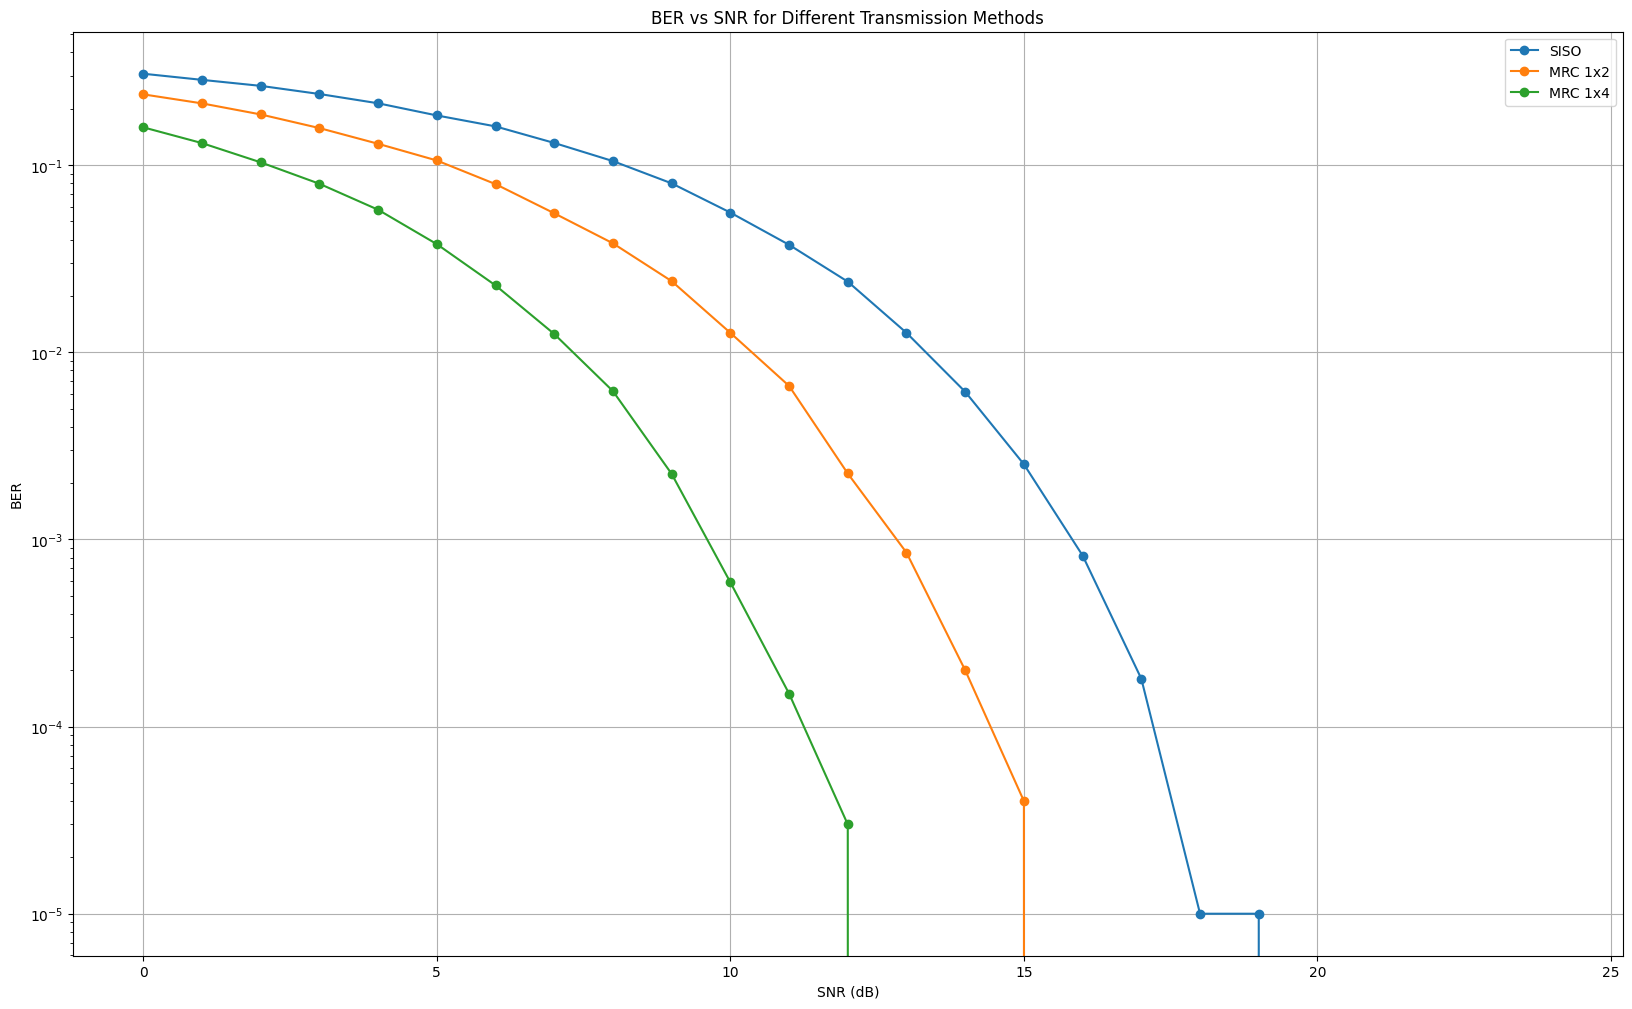

In [18]:
import matplotlib.pyplot as plt

plt.figure()

# altera o tamanho da figura 
plt.figure(figsize=(20, 12))
plt.semilogy(snr_range, ber_siso, marker='o', label='SISO')
plt.semilogy(snr_range, ber_mrc_1x2, marker='o', label='MRC 1x2')
plt.semilogy(snr_range, ber_mrc_1x4, marker='o', label='MRC 1x4')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title('BER vs SNR for Different Transmission Methods')
plt.legend()
plt.grid(True)
plt.show()